## Introduction

In this notebook we'll see how underfit and overfit looks like with an example.

The simplest model is a linear regression, where the outputs are a linearly weighted combination of the inputs. In this case we are going to use polynomial regression with just one input variable $x$ and one ouptut variable $y$.

In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Model

The general equation for a polynomial is below.

$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 \dots + \theta_n x^n + \epsilon$$

Here $y$ represents the **target** and $x$ the **feature**.

The $\theta$ coefficients are the model **parameters** which are to be learned during training and $\epsilon$ is the error present in any model (not to be confused with the error function).

We can consider the degree of the polynomial as an **hyperparameter** that we need to choose.

## Data

Let's create some syntetic data with the function

$$f(x) = \cos\left(\frac{3}{2}\pi x\right)$$

and add some random noise.

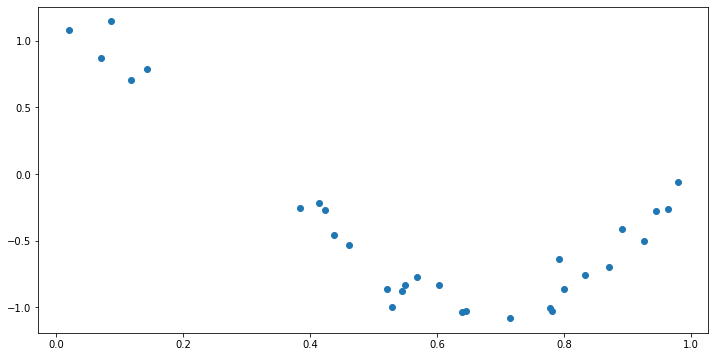

In [ ]:
np.random.seed(0)

f = lambda x: np.cos(1.5 * np.pi * x)
n_samples = 30

x_val = np.sort(np.random.rand(n_samples))
y_val = f(x_val) + np.random.randn(n_samples) * 0.1   # Here y = f(x) + some random noise

plt.figure(figsize=(12, 6));
plt.scatter(x, y);

## Helper functions

Now let's create some functions to fit a linear regression to the data with a specific degree hyperparameter and plot the results.

In [5]:
def make_linear_regression(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipe = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipe.fit(x[:, np.newaxis], y)
    
    return pipe

def plot_results(f, x, y, pipe, degree):
    x_line = np.linspace(0, 1, 100)   
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, label="Samples", color="green")
    plt.plot(x_line, pipe.predict(x_line[:, np.newaxis]), label="Model")
    plt.plot(x_line, f(x_line), label="True function")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("Degree %d" % degree)

## Model training

We choose a specific degree as hyperparameter and then fit the model to the data plotting the results.

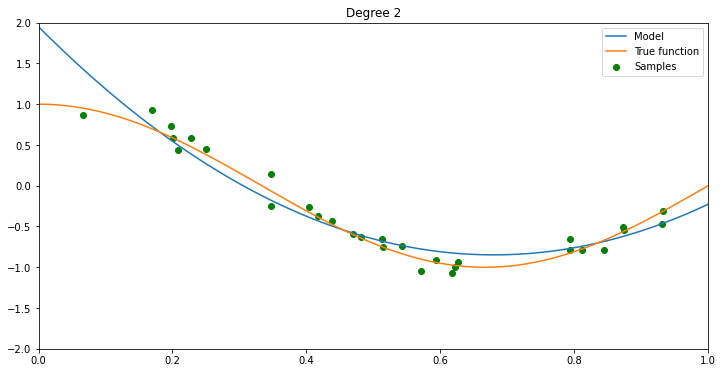

In [8]:
degree = 2
pipe = make_linear_regression(x_val, y_val, degree)
plot_results(f, x_val, y_val, pipe, degree)

### Learned parameters

The coefficients of the linear regression model are the parameters learned from the data. They are the result of the "best attempt" of the model (given its capacity) to fit to the data provided.

In [ ]:
# Coefficients of linear regression (parameters)
pipe['linear_regression'].intercept_, pipe['linear_regression'].coef_

(1.5411486872392535, array([-7.31956683,  5.55955392]))

In [ ]:
pipe['polynomial_features'].get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

$\hat{y} = 1.54 - 7.32 x + 5.56 x^2$

### Training error

Now compare the true values $y$ with the predicted values $\hat{y}$ predicted by the model using Mean Absolute Error (MAE) as error function.

In [ ]:
y_hat = pipe.predict(x_val[:, np.newaxis])
train_error = mean_absolute_error(y_val, y_hat)
train_error

0.15088109160456897

## Validate the model with new data

Now, to validate the performance of the model with new data from the same distribution as the training data we generate a new dataset (validation set).

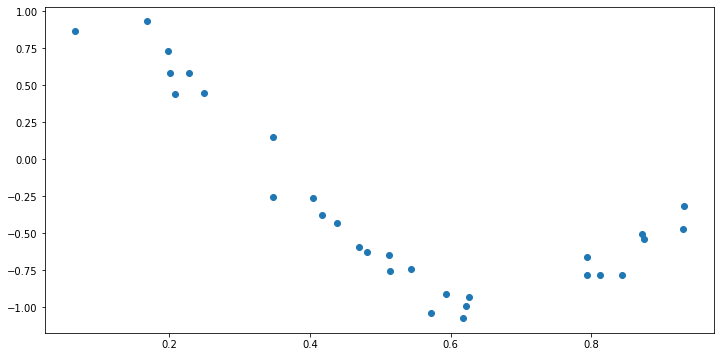

In [3]:
np.random.seed(904)

f = lambda x: np.cos(1.5 * np.pi * x)
n_samples = 30

x_val = np.sort(np.random.rand(n_samples))
y_val = f(x_val) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(12, 6));
plt.scatter(x_val, y_val);

### Predicting the validation data

Lets plot how the model we have fits the new data and measure the error.

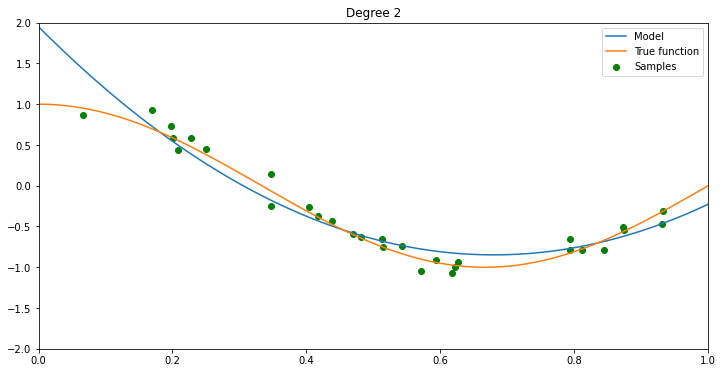

In [9]:
plot_results(f, x_val, y_val, pipe, degree)

In [ ]:
y_hat_val = pipe.predict(x_val[:, np.newaxis])
val_error = mean_absolute_error(y_val, y_hat_val)
val_error

0.17114595663617216

## Your task

Now you have seen examples of the difference between the error in training data and the error in validation data your task is to iterate on the degree hyperparameter from 1 to 25 fitting the corresponding model to the training data and use it to make predictions with the validation data.

Each team must generate a different validation data changing the value of the random seed as in

```np.random.seed(904)```

but please use the same training data.

You need to produce a graph with the degree of the polynomial on the x axis and the error measurement on the y axis. The plot should include the training error and the validation error measurements to compare its behavior.

Analyze the graph and report when you see underfit or overfit. Decide which degree you think produced the best model and explain why.

Finally, generate a new sample of 30 data points (test set), and use your selected model to make predictions on this test set. Report the error measurement on the test set and compare it with the training and validation error for the same model.


In [ ]:
# Your code here